## Mini pproject 1:  Reading Skill

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('readingskills.csv')

In [3]:
data.shape

(205, 5)

In [4]:
data.head()

,Unnamed: 0,nativeSpeaker,age,shoeSize,score
0,1,yes,5.0,24.831889,32.293850
1,2,yes,6.0,25.952378,36.631049
2,3,no,11.0,30.421700,49.605927
3,4,yes,7.0,28.664501,40.284556
4,5,yes,11.0,31.882070,55.460851


In [5]:
data.tail()

,Unnamed: 0,nativeSpeaker,age,shoeSize,score
200,201,no,NaN,NaN,37.548872
201,202,yes,5.0,23.983696,32.170169
202,203,yes,7.0,27.945321,40.381101
203,204,no,7.0,26.898883,33.636685
204,205,no,8.0,26.706719,38.685425


In [6]:
cols = ['col_index','nativeSpeaker','age','shoeSize','score']

In [7]:
data.columns = cols

In [8]:
data = data.set_index(['col_index'])

In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nativeSpeaker  204 non-null    object 
 1   age            203 non-null    float64
 2   shoeSize       203 non-null    float64
 3   score          204 non-null    float64
dtypes: float64(3), object(1)
memory usage: 8.0+ KB


In [11]:
data.describe()

,age,shoeSize,score
count,203.000000,203.000000,204.000000
mean,7.926108,27.876481,40.674667
std,1.879925,2.054174,8.544681
min,5.000000,23.173425,25.262491
25%,6.000000,26.229343,33.937146
50%,8.000000,27.864895,40.332828
75%,9.000000,29.491304,47.573671
max,11.000000,32.327787,56.711508


In [12]:
# Check missing values:
data.isnull().sum()

nativeSpeaker    1
age              2
shoeSize         2
score            1
dtype: int64

In [13]:
# Handle missing values:
# Replace null values by mean:
num = ['age','shoeSize','score']
data[num] = data[num].transform(lambda x: x.fillna(x.mean()))
# drop na values on target
data=data.dropna(axis = 0, how ='any')

In [14]:
# Check missing values again
data.isnull().sum()

nativeSpeaker    0
age              0
shoeSize         0
score            0
dtype: int64

In [15]:

# Replace yes/no by 1/0
data = data.replace("yes", 1.)
data = data.replace("no", 0.)
data.head()

,nativeSpeaker,age,shoeSize,score
col_index,,,,
1,1.0,5.0,24.831889,32.293850
2,1.0,6.0,25.952378,36.631049
3,0.0,11.0,30.421700,49.605927
4,1.0,7.0,28.664501,40.284556
5,1.0,11.0,31.882070,55.460851


In [16]:
data.tail()

,nativeSpeaker,age,shoeSize,score
col_index,,,,
201,0.0,7.926108,27.876481,37.548872
202,1.0,5.000000,23.983696,32.170169
203,1.0,7.000000,27.945321,40.381101
204,0.0,7.000000,26.898883,33.636685
205,0.0,8.000000,26.706719,38.685425


In [17]:
features = data[['age','score']]
features.head()

,age,score
col_index,,
1,5.0,32.293850
2,6.0,36.631049
3,11.0,49.605927
4,7.0,40.284556
5,11.0,55.460851


In [18]:
target = data[['nativeSpeaker']]
target.head()

,nativeSpeaker
col_index,
1,1.0
2,1.0
3,0.0
4,1.0
5,1.0


In [19]:
# train model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)
prediction = clf.predict([[12., 50.]])
print(prediction)

[0.]


In [20]:
# Split dữ liệu và xem xét tính chính xác của model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=55)
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0.])

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  1]
 [ 0 18]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        23
         1.0       0.95      1.00      0.97        18

    accuracy                           0.98        41
   macro avg       0.97      0.98      0.98        41
weighted avg       0.98      0.98      0.98        41



In [22]:
#Vẽ hình:
with open("nativeSpeaker_result.txt","w") as f:
    f = tree.export_graphviz(clf, feature_names=features.columns.values, out_file=f)
    print("Đã xuất file")

Đã xuất file


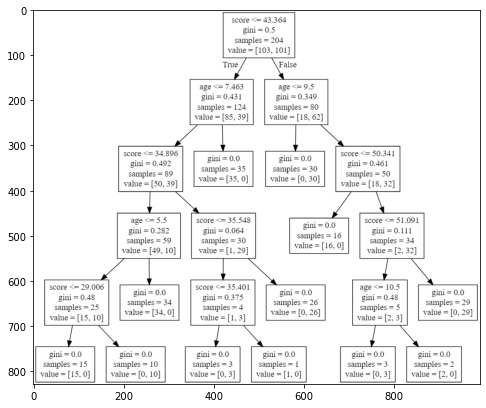

In [23]:
import matplotlib.pyplot as plt
import imageio
photo_data = imageio.imread("nativeSpeaker.png")
plt.figure(figsize=(8, 8))
plt.imshow(photo_data)

Vì đã test model 2 biến (age và score) cho kết quả chính xác cao hơn model 3 biến nên chọn 2 biến để predict cho các mẫu test

In [24]:
# Test những người nào native/không phải native
prediction = clf.predict([[5, 33],[30, 40],[10,51],[10, 35],[7, 36]])
print(prediction)

[1. 0. 1. 0. 1.]
